<a href="https://colab.research.google.com/github/Ayususanti/Studi-Independen-Coding/blob/main/Image_Segmentation_pada_buah_apel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KELOMPOK 3 JUMATEC**

Nama Anggota :
1. Khadafy Rafsanjani
2. Ayu Susanti
3. Ami Widyastutik
4. Farah Tatania


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

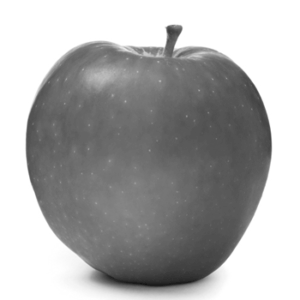

In [12]:
img = cv2.imread('/content/apple_28.jpg', 0)
cv2_imshow(img)

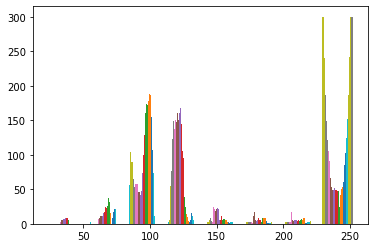

In [13]:
x = img
plt.hist(x, bins=8)
plt.show()

In [14]:
img.shape

(300, 300)

# Discontinuity Approach: Edge Detection

In [15]:
smoothing = np.array([[1,1,1],
                      [1,1,1],
                      [1,1,1]])

sharpening = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])

filter1 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

filter2 = np.array([[1,2,1],
                    [0,0,0],
                    [-1,-2,-1]])

filter3 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

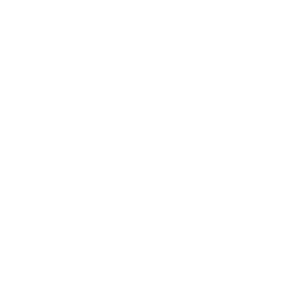

In [16]:
# smoothing
smooth_img = cv2.filter2D(img, ddepth=-1, kernel=smoothing)
cv2_imshow(smooth_img)

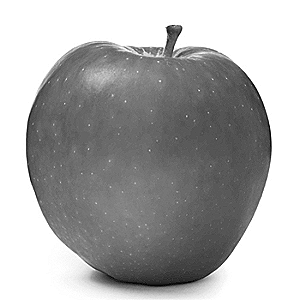

In [17]:
# Sharpening
sharp_img = cv2.filter2D(img, ddepth=-1, kernel=sharpening)
cv2_imshow(sharp_img)

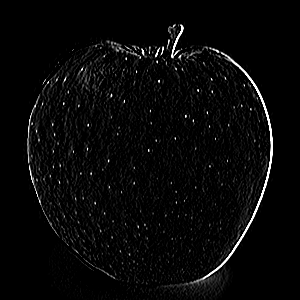

In [18]:
# Sobel Filter
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter1)
cv2_imshow(edge_img)

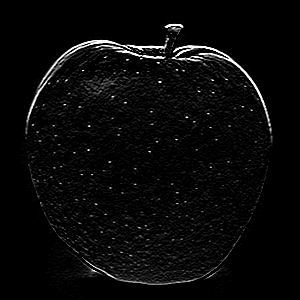

In [19]:
# Sobel Filter
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter2)
cv2_imshow(edge_img)

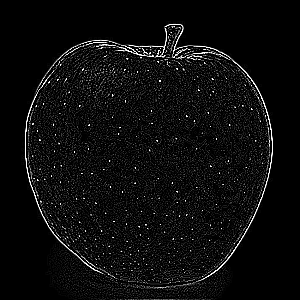

In [20]:
# Edge Detection
edge_img = cv2.filter2D(sharp_img, ddepth=-1, kernel=filter3)
cv2_imshow(edge_img)

## Algoritma Canny

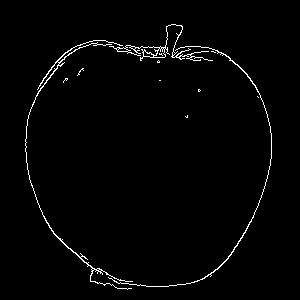

In [21]:
# Canny
edge_img = cv2.Canny(sharp_img, 80, 500)
cv2_imshow(edge_img)

Selanjutnya, hasil edge detection bisa kita implementasikan untuk kasus AI, seperti object detection.

# Similar Approach: Clustering with K-Means

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

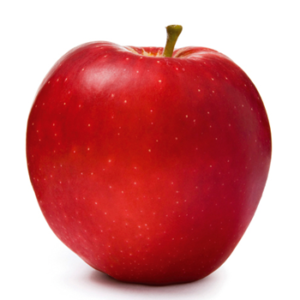

In [24]:
img = cv2.imread('/content/apple_28.jpg')
cv2_imshow(img)

In [25]:
# Reshaping image menjadi array 2D: pixel & channel
nilai_pixel = img.reshape((-1,3))
 
# Ubah menjadi float
nilai_pixel = np.float32(nilai_pixel)

In [27]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Definisikan kriteria clustering, akan berhenti jika
# - iterasi mencapai 100
# - akurasi 85%

In [28]:
# Melakukan clustering dengan jumlah cluster = 3
k = 4
retval, labels, centers = cv2.kmeans(nilai_pixel, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# labels = label tiap pixel
# centers = centroid

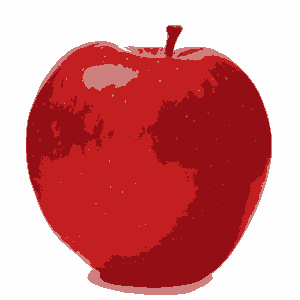

In [29]:
# ubah centroid menjadi int karena image perlu nilai int
centers = np.uint8(centers)

# tetapkan centroid ke tiap label pixel
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))
cv2_imshow(segmented_image)